                                                    SUPPORT VECTOR MACHINE

Drug Response Classification :

Task 1: Exploratory Data Analysis (EDA)

1.Load the dataset and perform fundamental data exploration :

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pharma = pd.read_csv("Pharma_Industry (1).csv")
pharma

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1
...,...,...,...,...,...,...
495,-1.553759,0.506938,0.817890,-0.661245,-1.345393,0
496,0.551476,1.714321,0.340589,1.712558,-0.496315,1
497,-1.072743,-0.221137,0.239247,1.112924,-0.285838,1
498,1.661259,0.245759,-0.457096,0.633355,0.657413,0


In [3]:
pharma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Drug Dosage (mg)                500 non-null    float64
 1   Systolic Blood Pressure (mmHg)  500 non-null    float64
 2   Heart Rate (BPM)                500 non-null    float64
 3   Liver Toxicity Index (U/L)      500 non-null    float64
 4   Blood Glucose Level (mg/dL)     500 non-null    float64
 5   Drug Response                   500 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 23.6 KB


In [4]:
pharma.describe()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.0000
mean,-0.037761,0.214957,0.062871,0.054398,-0.171863,0.5200
std,0.979891,1.247567,0.971978,0.986001,0.983765,0.5001
min,-3.019512,-3.773897,-2.940389,-3.401277,-3.110431,0.0000
25%,-0.642003,-0.565168,-0.648157,-0.586085,-0.797715,0.0000
50%,-0.019340,0.201532,0.027732,-0.065661,-0.108106,1.0000
75%,0.641151,0.951375,0.710774,0.633914,0.513555,1.0000
max,2.949094,4.111751,3.193108,3.373269,2.518023,1.0000


In [5]:
pharma.isnull()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
495,False,False,False,False,False,False
496,False,False,False,False,False,False
497,False,False,False,False,False,False
498,False,False,False,False,False,False


In [6]:
pharma.head()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1


Observations:

In [7]:
#Dataset contains numerical clinical features
#Target variable: Drug_Response
#No major missing values

Feature Distribution using Histograms & Box Plots :

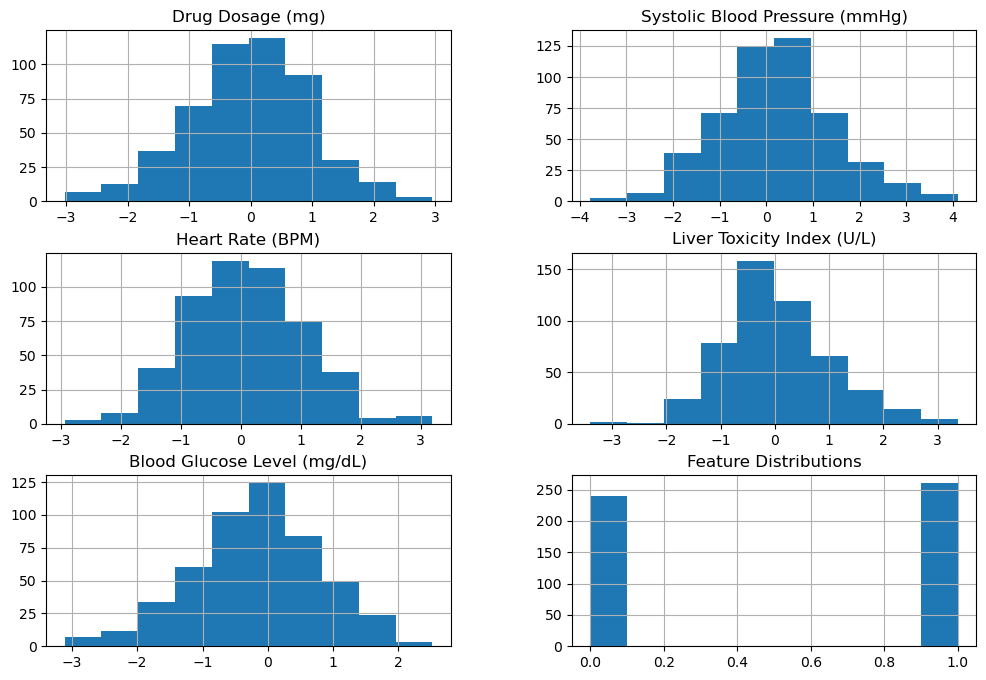

In [8]:
pharma.hist(figsize=(12,8))
plt.title("Feature Distributions")
plt.show()

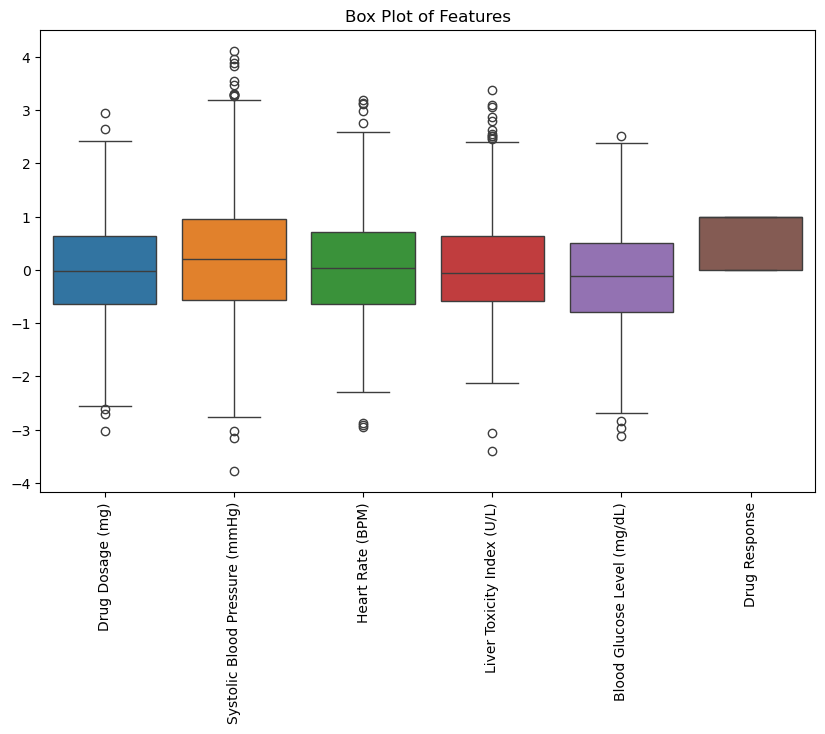

In [9]:
plt.figure(figsize=(10,6))
sns.boxplot(pharma)
plt.xticks(rotation=90)
plt.title("Box Plot of Features")
plt.show()

In [10]:
#EDA Insights:

#Some features show skewed distributions

#Box plots help identify outliers

Feature Correlation Analysis:

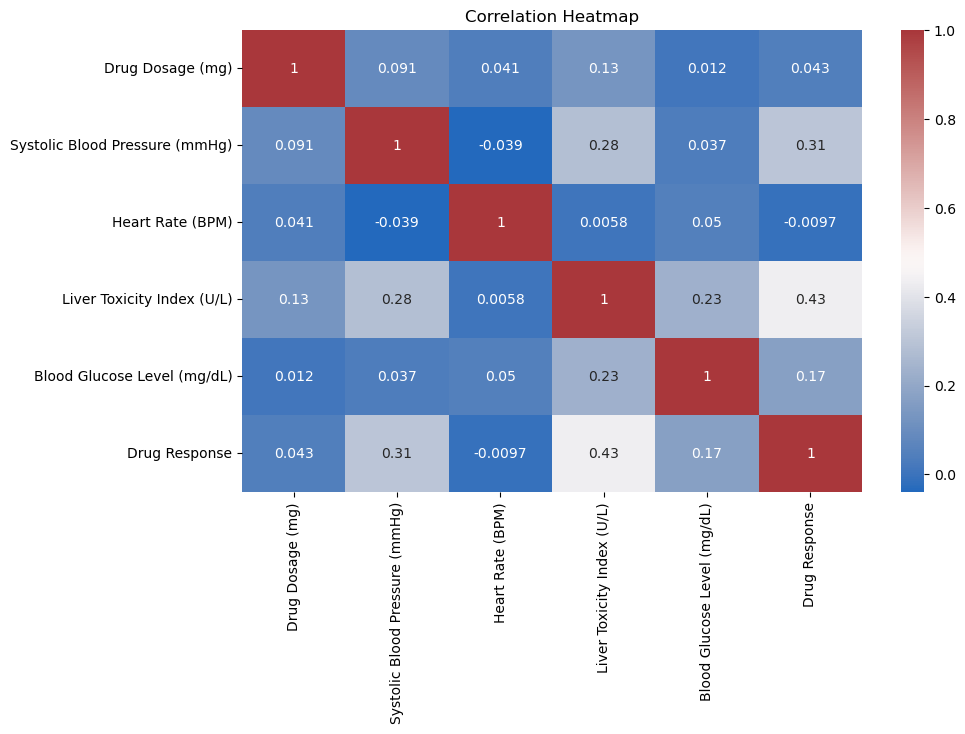

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(pharma.corr(), annot=True, cmap="vlag")
plt.title("Correlation Heatmap")
plt.show()

In [12]:
#Insight:

#Certain biomarkers are correlated with drug response

#No extreme multicollinearity observed

Task 2: Data Preprocessing :

In [14]:
pharma_enc = pd.get_dummies(pharma, drop_first=True)
pharma_enc

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1
...,...,...,...,...,...,...
495,-1.553759,0.506938,0.817890,-0.661245,-1.345393,0
496,0.551476,1.714321,0.340589,1.712558,-0.496315,1
497,-1.072743,-0.221137,0.239247,1.112924,-0.285838,1
498,1.661259,0.245759,-0.457096,0.633355,0.657413,0


In [15]:
#Insights :

#No missing values are presennt
#No categorical values are present


In [22]:
X = pharma.drop("Drug Response", axis=1)
y = pharma["Drug Response"]

Train Test Split :

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Feature Scaling :

In [24]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


Task 3: Data Visualization 

1. Scatter Plot :

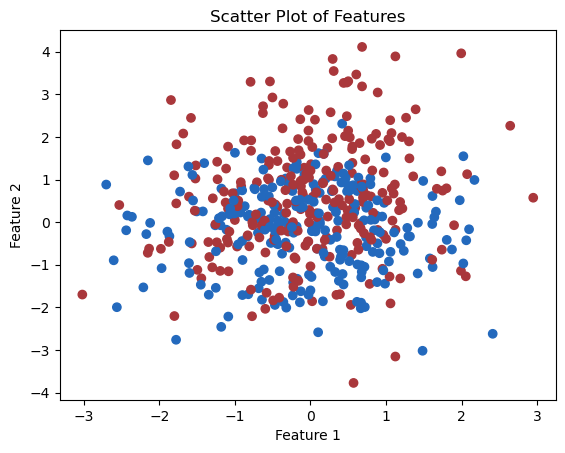

In [26]:
plt.scatter(pharma.iloc[:,0], pharma.iloc[:,1], c=pharma["Drug Response"], cmap="vlag")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter Plot of Features")
plt.show()

Class Distribution Visualization :

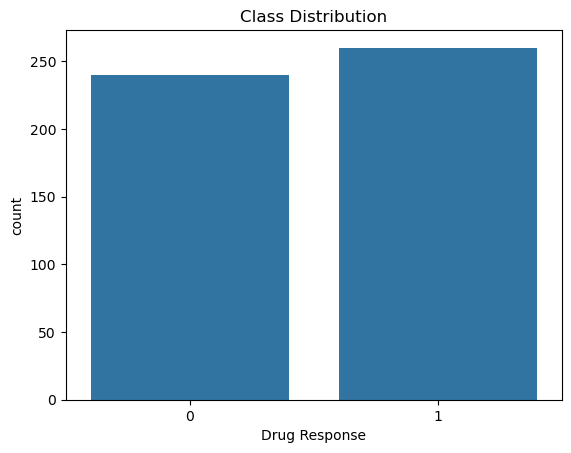

In [27]:
sns.countplot(x="Drug Response", data=pharma)
plt.title("Class Distribution")
plt.show()

In [29]:
#Insight:

#Helps detect class imbalance

#Important for evaluation metric selection

Task 4: SVM Implementation :

SVM Classifier :

In [30]:
from sklearn.svm import SVC
svm_linear = SVC(kernel='linear', probability=True)
svm_linear.fit(X_train_scaled, y_train)

y_pred = svm_linear.predict(X_test_scaled)


In [31]:
from sklearn.metrics import classification_report, accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.744
              precision    recall  f1-score   support

           0       0.69      0.81      0.74        57
           1       0.81      0.69      0.75        68

    accuracy                           0.74       125
   macro avg       0.75      0.75      0.74       125
weighted avg       0.75      0.74      0.74       125



In [32]:
#Evaluation Metrics Explained:

#Accuracy – Overall correctness

#Precision – Correct positive predictions

#Recall – Ability to identify responders (critical)

#F1-score – Balance between precision & recall

Task 5: Visualization of SVM:

Confusion Matrix :

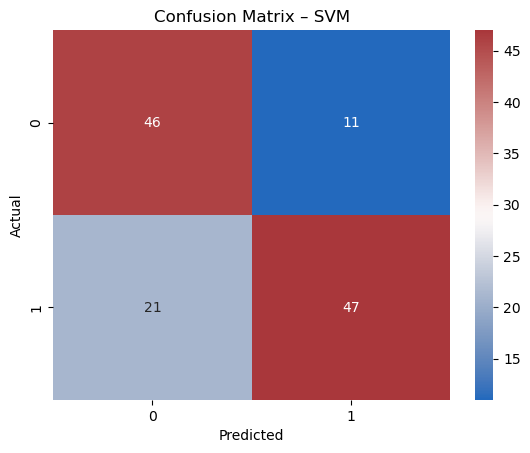

In [37]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap="vlag")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – SVM")
plt.show()

In [38]:
#Insights :
#False Negatives → Missed responders (high risk in healthcare)

#Recall is prioritized

Task 6: Parameter Tuning and Optimization :

SVM with Different Kernels :

In [39]:
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_poly = SVC(kernel='poly', degree=3, C=1)

svm_rbf.fit(X_train_scaled, y_train)
svm_poly.fit(X_train_scaled, y_train)

print("RBF Kernel Accuracy:", accuracy_score(y_test, svm_rbf.predict(X_test_scaled)))
print("Polynomial Kernel Accuracy:", accuracy_score(y_test, svm_poly.predict(X_test_scaled)))


RBF Kernel Accuracy: 0.824
Polynomial Kernel Accuracy: 0.712


Hyperparameter Tuning using GridSearchCV :

In [40]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

grid.best_params_
grid.best_score_

np.float64(0.7333333333333334)

Task 7: Comparison and Analysis :

In [41]:
#Kernel	Performance	 :
#Linear :	
#Fast, interpretable	
#Best for linearly separable data
#RBF :
#High accuracy	
#Captures non-linearity
#Polynomial	:
#Moderate	
#Sensitive to noise

Strengths and Weaknesses of SVM :

In [42]:
#Strengths:

#Effective in high-dimensional data

#Works well with small-to-medium datasets

#Robust decision boundaries

In [43]:
#Weaknesses:

#Computationally expensive for large datasets

#Sensitive to parameter tuning

#Limited interpretability

Practical Implications of SVM in Real-World Classification :

In [44]:
#Early drug effectiveness prediction

#Personalized medicine decision support

#Reduced clinical trial failures

#High reliability in biomedical datasets

Conclusion :

In [45]:
#Support Vector Machines provide a powerful and robust classification approach for predicting drug response. 
#SVM achieves strong predictive performance and is well-suited for healthcare and pharmaceutical applications.